<a href="https://colab.research.google.com/github/Irina-64/AML-22_FEML-9/blob/master/Trubchik_HW1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import operator
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

<h2 style="text-align: center;"><b>Классификация: Логистическая регрессия и SVM</b></h2><h3> Домашняя работа №1</h3>

1. Получим данные с моего гугл-диска по ссылке https://drive.google.com/file/d/1a8_6967Scrj_1lz88aMEUEBCRqr5IhiA/view?usp=sharing  в рабочую среду https://colab.research.google.com/drive/ при помощи команды "df = pd.read_csv('adult.csv')"

Прочитаем данные и посмотрим на первые 5 строк с помощью метода head

In [ ]:
# url = 'https://drive.google.com/file/d/1a8_6967Scrj_1lz88aMEUEBCRqr5IhiA/view?usp=sharing'
df = pd.read_csv("/content/drive/MyDrive/aml-22_feml-9/adult.csv")
df.head() 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.tail() # последние пять строк

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


в описании к датасету обозначена тема: “Задача состоит в том, чтобы на основе данных переписи предсказать, превышает ли годовой доход человека 50 000 долларов”. Можно попробовать увидеть влияют ли на доход разные атрибуты датасета (заголовки столбцов)

### первичный анализ
Можно узнать размер датасета, информацию о его значениях, различные статистики по значениям. А также можно прочитать описание этого датасета в репозитории http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html 

In [ ]:
# размер датасета (число строк, число столбцов)
df.shape

(48842, 15)

учитывая, что первая строка - заголовки, а первый столбец - индексация пандас, то, согласно описанию в репозитории, в этой табличке 14 полей (атрибутов) и 48841 строка

In [ ]:
df.columns # названия столбцов

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Проверяем данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками

проверяем информацию о количестве каждого уникального значения для каждого столбца в наборе данных

In [ ]:
df.info() # покажем информацию о размерности данных 
          # описание индекса, количество not-a-number элементов 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Эта команда показала, что в данных 6 атрибутов типа int64 (большие целые), 8 атрибутов - категориальные и один признак - целевая переменная (уровень дохода income), который принимает два значения <=50K и >50K, что дает нам право соотнести его с некоторым бинарным признаком. Выдача команды показывает отсутствие пустых (Nan) значений. Но для данных типа object проведем дополнительную проверку на присутствие "пропущенных" значений

In [ ]:
df.describe().T # Все описательные статистики данных (кол-во непропущенных значений, среднее, медиана, минимум, максимум, квартили)

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [ ]:
feature_names = df.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(df[column].value_counts(dropna=False))
    print('*'*30) 


age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
******************************
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
******************************
fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
131379     1
160061     1
334224     1
45381      1
208174     1
Name: fnlwgt, Length: 28523, dtype: int64
******************************
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctor

In [ ]:
import seaborn as sns 

## Визуализация зависимостей между признаками

### признаки по одному
#### количественные

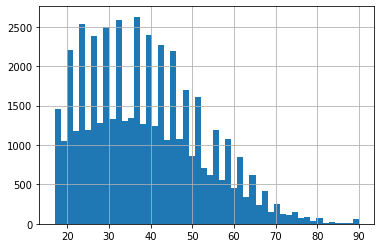

In [ ]:
df["age"].hist(bins=50); # гистограмма распределения признака

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


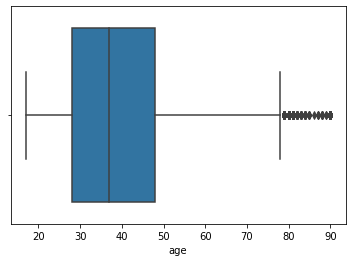

In [ ]:
sns.boxplot(df["age"]); # ящик с усами (boxplot)

#### Категориальные (качественные)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


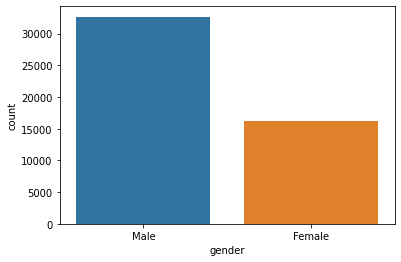

In [ ]:
# график распределения по категорим (количество объектов по всем категорим переменной)
sns.countplot(df["gender"]); 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


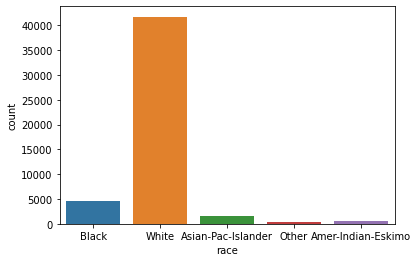

In [ ]:
sns.countplot(df[df["race"].isin(df["race"].value_counts().head().index)]["race"]);

 Дополнительная проверка на присутствие "пропущенных" значений в категориальных признаках

In [ ]:
df["workclass"].unique() # уникальные значения столбца workclass

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df["workclass"].value_counts() # распределение по уникальным значениям

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
2799/48841*100 # процент пропущенных данных

5.730840891873631

In [ ]:
df["occupation"].unique() # уникальные значения столбца occupation

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [ ]:
df["occupation"].value_counts() # распределение по уникальным значениям

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
2809/48841*100 # процент пропущенных данных

5.751315493130772

In [ ]:
df["native-country"].unique() # уникальные значения столбца native-country

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [ ]:
df["native-country"].value_counts() # распределение по уникальным значениям

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [ ]:
857/48841*100 # процент пропущенных данных

1.7546733277369424

In [ ]:
df["education"].value_counts() # распределение по уникальным значениям education

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
df["marital-status"].value_counts() # распределение по уникальным значениям marital-status

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [ ]:
df["relationship"].value_counts() # распределение по уникальным значениям relationship


Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [ ]:
df["race"].value_counts() # распределение по уникальным значениям race


White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [ ]:
df["gender"].value_counts() # распределение по уникальным значениям gender 

Male      32650
Female    16192
Name: gender, dtype: int64

Итак, мы убедились, что в этих признаках присутствуют пропущенные данные в виде символа "?"

## Обработка пропусков в данных

Зачастую не существует шаблонных подходов к этой задаче, поскольку подходы во многом зависит от контекста и характера данных. Например, являются ли данные случайными пропусками или же есть скрытая связь между пропусками и некоторым другим записями в обучающем примере?
Один из способов простых способов решения этой проблемы - просто игнорировать или удалять строки, в которых отсутствуют данные, выбрасывая их из нашего анализа. Однако этот метод может быть плох из-за потери информации.
Еще один способ — это заполнение пропусков, где мы заменяем отсутствующее значение каким-либо образом. Базовые реализации просто заменят все отсутствующие значения средним, медианным, либо же константой.

Для начала выясним, что делать с пропущенными значениями, найденными в *workclass* и *occupation*. В обоих случаях столбец содержит категориальные данные и доля пропущенных значений не превышает 6% от общего количества строк. 
Похоже, что удаление таких строк не должно повлиять на точность анализа.

С пропусками в *native-country* не все так просто. Доля пропусков в общем количестве не превышает 2%, однако количество пропусков (857) превышает показатели других категорий в этом столбце. 

В описании датасета авторами была дана подсказка о методе очистки данных "Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only uses cases with no missing values." Последуем этому указанию и создадим в "рабочем" датасете только строки, не содержащие "?".

Также в описании присутствует указание: "A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))", что указывает на применение среза по столбцам с применением условий в индексах.

## Взаимодействия признаков

#### Количественный с количественным

In [ ]:
df_int64 = df.select_dtypes(include="int64") # выбор признаков типа int64
df_int64

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


In [ ]:
df_feat = [f for f in df_int64.columns] # выбор удовлетворяющих условию колонок
df_feat

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

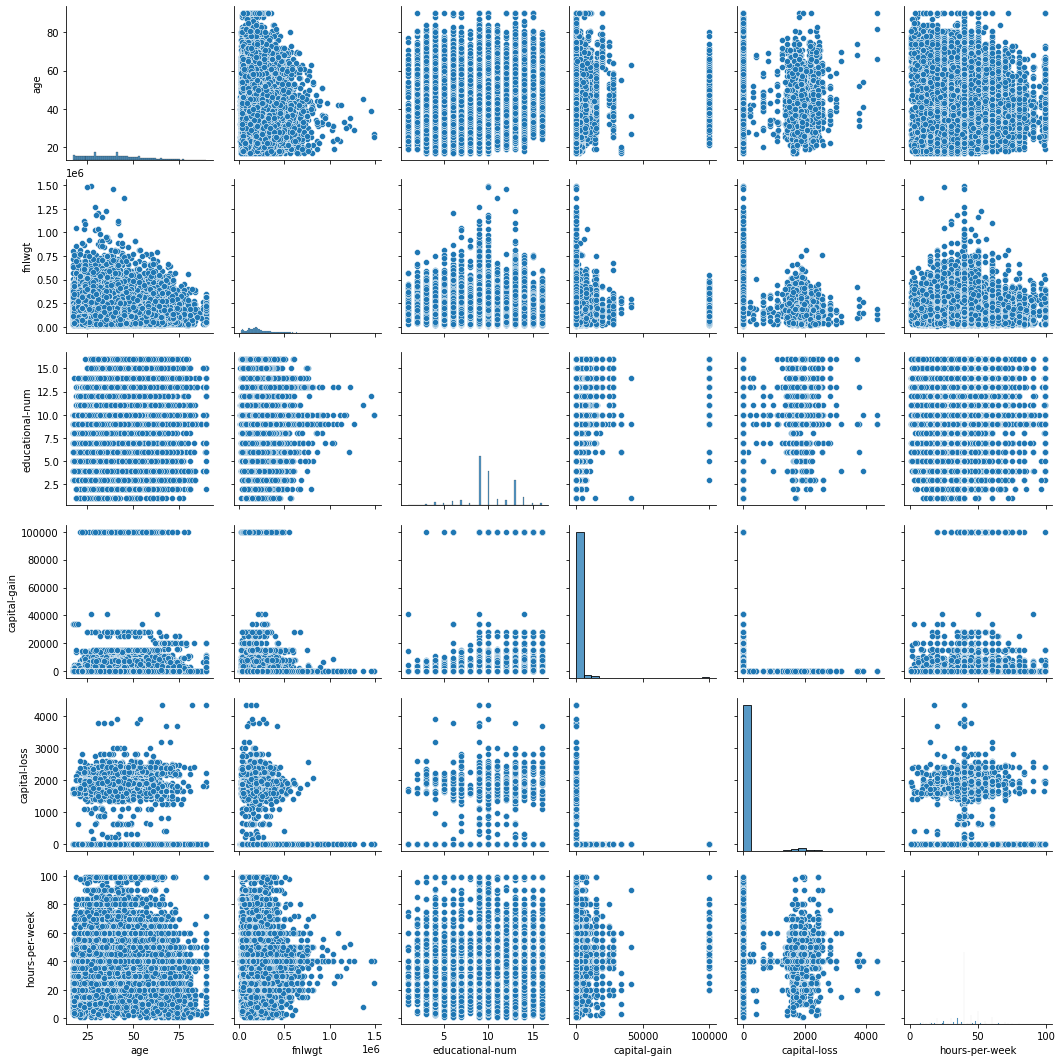

In [ ]:
sns.pairplot(df[df_feat]);

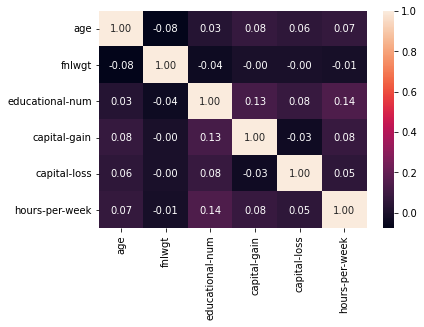

In [ ]:
# визуализация корреляционной матрицы
# на корр. матрице видим максимальные корреляции между некоторыми признаками
sns.heatmap(df[df_feat].corr(), annot=True, fmt=".2f")


по этой карте можно сделать вывод о том, что между уровнем образования (educational-num) и достигнутым капиталом (capital-gain), а также с количеством часов в неделю (hours-per-week) существует какая-то взаимосвязь в данном датасете (что неудивительно, но не всегда соответствует реальности, к сожалению) 

#### Попробуем найти взаимосвязь между количественными признаками и категориальными

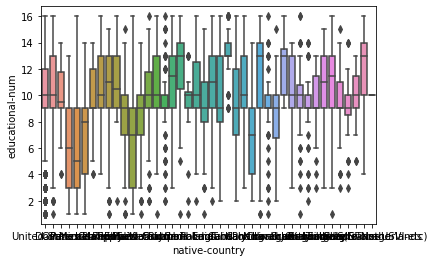

In [ ]:
sns.boxplot(x="native-country", y = "educational-num", data = df);

In [ ]:
nat_country = df["native-country"].value_counts().head().index

In [ ]:
n_state = list(df[df["native-country"].isin(nat_country)]["native-country"].unique())
n_state

['United-States', '?', 'Mexico', 'Germany', 'Philippines']

In [ ]:
# выбираем нужные страны 
df_new = df[(df["native-country"] == 'United-States') | (df["native-country"] == 'Germany')] 

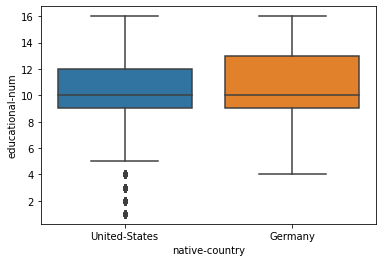

In [ ]:
# строим boxplots выбранных стран
sns.boxplot(x = "native-country", y = "educational-num", data = df_new) 

#### Категориальный с категориальным

In [ ]:
# кросс-таблица двух категор. признаков
pd.crosstab(df["education"], df["income"]) 

income,<=50K,>50K
education,,
10th,1302,87
11th,1720,92
12th,609,48
1st-4th,239,8
5th-6th,482,27
7th-8th,893,62
9th,715,41
Assoc-acdm,1188,413
Assoc-voc,1539,522


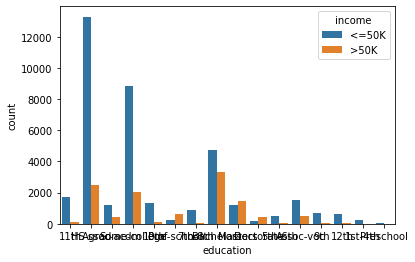

In [ ]:
sns.countplot(x="education", hue = "income", data = df);

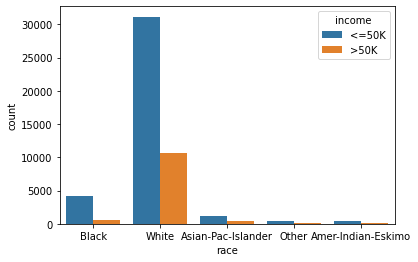

In [ ]:
sns.countplot(x="race", hue = "income", data = df)

### Преобразование категориальных признаков.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

***One-Hot-Encoding (Dummy variables)***

In [ ]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = df[ [ 'age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income'] ]
display(selectedColumns.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,25,Private,11th,Male,40,Machine-op-inspct,<=50K
1,38,Private,HS-grad,Male,50,Farming-fishing,<=50K
2,28,Local-gov,Assoc-acdm,Male,40,Protective-serv,>50K
3,44,Private,Some-college,Male,40,Machine-op-inspct,>50K
4,18,?,Some-college,Female,30,?,<=50K


***Проверка строковых категориальных данных***

In [ ]:
print(selectedColumns.gender.value_counts())

Male      32650
Female    16192
Name: gender, dtype: int64


In [ ]:
print("Original features:\n", list(selectedColumns.columns), "\n")
df_dummies = pd.get_dummies(selectedColumns)
print("Features after get_dummies:\n", list(df_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'gender_Female', 'gender_Male', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service',

In [ ]:
display(df_dummies.head())

,age,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,gender_Female,gender_Male,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,income_<=50K,income_>50K
0,25,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,38,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,28,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,44,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,18,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Сформируем тестовую выборку с таргетом для 'income_>50K'

In [ ]:
features = df_dummies.loc[:, 'age':'occupation_Transport-moving']
# Extract NumPy arrays
X = features.values
y = df_dummies['income_>50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (48842, 44)  y.shape: (48842,)


#### разбиваем выборку на обучающую и тестовую и формируем модель для логистической регрессии

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


*тестовый скор = 81% поэтому пробуем перестроить модель*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=12)
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg1.score(X_test, y_test)))

Test score: 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


*последуем совету и масштабируем данные  - закодируем категориальные признаки числами, роименив OneHotEncoder*

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [ ]:
df_features = df.drop("income", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    df_features, df.income, train_size=0.8, random_state=12)

# обучаем на части датасета (train)
ct.fit(X_train, y_train)

X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(39073, 44)


In [ ]:
model = LogisticRegression(max_iter=1000)  # Increase the number of iterations (max_iter)
model.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(model.score(X_test_trans, y_test)))

Test score: 0.81


In [ ]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)